In [ ]:
#hBN nanoresonator mode polarisation plots

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
import scipy.integrate as integrate
import scipy.special as special

ImportError: No module named nplab.datafile

In [3]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
copper_map = LinearSegmentedColormap.from_list('copper', cm_data)
colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))
Alex_data = Alexsdatafuncs.data_manipulators()
Alex_plot = Alexsdatafuncs.plotting_funcs()

In [14]:
df.close_current()

In [1]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

NameError: name 'df' is not defined

In [11]:
gui = data_f.show_gui()

Running GUI, this will block the command line until the window is closed.


In [5]:
opt_meas_1 = data_f['OceanOpticsSpectrometer']

C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


(1.5, 3)

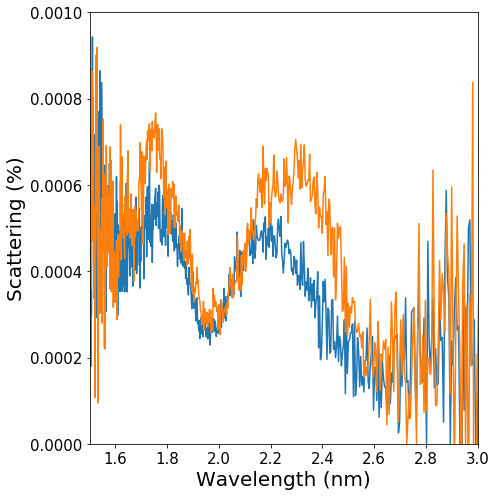

In [113]:
#Scattering

df_ref = opt_meas_1.values()[0].attrs['reference']
df_bgd = opt_meas_1.values()[0].attrs['background']
wl = opt_meas_1.values()[0].attrs['wavelengths']
PolDF1 = ((opt_meas_1["NP_min_0"].value) - df_bgd)/(df_ref - df_bgd)
PolDF2 = ((opt_meas_1["NP2_min270_0"].value) - df_bgd)/(df_ref - df_bgd)
start_wl = 410 #Wavelength range to use - normalisation can be ruined by noise
fin_wl = 850
start_ind = (np.abs(wl - start_wl)).argmin()
fin_ind = (np.abs(wl - fin_wl)).argmin()
e_r = 1243.125/wl

fig = plt.figure(1, figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(e_r,PolDF1)
ax.plot(e_r,PolDF2)
#ax.set_xlim(410, 850)
ax.set_ylabel("Scattering (%)", fontsize = 20)
ax.set_xlabel("Wavelength (nm)", fontsize = 20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(0, 0.001)
ax.set_xlim(1.5,3)


#fig.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/Polarisation dependence/Raw_pol_scattering_ratio.png', bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


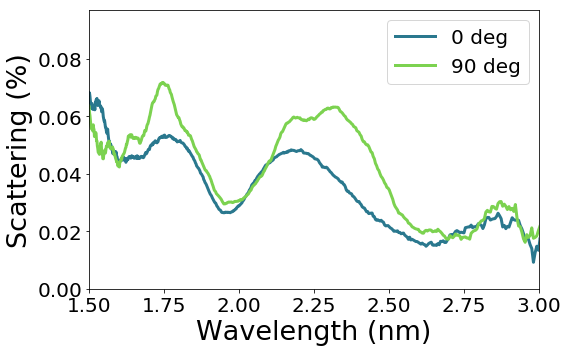

In [117]:
PolDF1_sm = sig.savgol_filter(PolDF1,23,1)
PolDF2_sm = sig.savgol_filter(PolDF2,23,1)
PolDF1_sm = PolDF1_sm[start_ind:fin_ind]
PolDF2_sm = PolDF2_sm[start_ind:fin_ind]
wl_r = wl[start_ind:fin_ind]
e = 1243.125/wl_r

fig = plt.figure(1, figsize = (8,5))
ax = fig.add_subplot(111)
ax.plot(e,PolDF1_sm*100, color = colours_1[200], label = "0 deg", lw=3 )
ax.plot(e,PolDF2_sm*100, color = colours_1[400], label = "90 deg", lw=3)
ax.set_ylabel("Scattering (%)", fontsize = 27)
ax.set_xlabel("Wavelength (nm)", fontsize = 27)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 0.097)
ax.set_xlim(1.5, 3.0)
ax.legend(fontsize = 20)

fig.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Fabry-Perot hBN publication/Pol meas/Filter1', bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys


(1.5, 3)

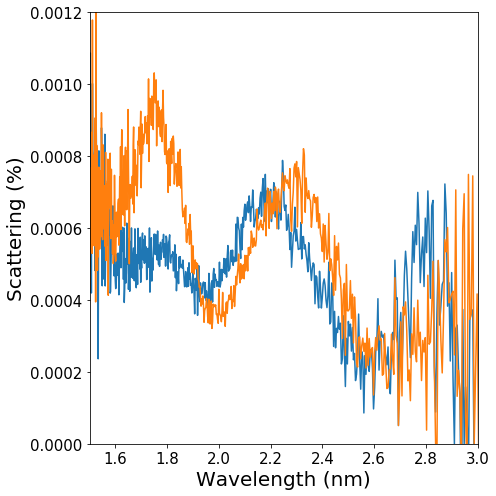

In [89]:
#Scattering

df_ref = opt_meas_1.values()[0].attrs['reference']
df_bgd = opt_meas_1.values()[0].attrs['background']
wl = opt_meas_1.values()[0].attrs['wavelengths']
PolDF1 = ((opt_meas_1["NP2_min340_f2_0"].value) - df_bgd)/(df_ref - df_bgd)
PolDF2 = ((opt_meas_1["NP2_min250_f2_0"].value) - df_bgd)/(df_ref - df_bgd)
start_wl = 410 #Wavelength range to use - normalisation can be ruined by noise
fin_wl = 850
start_ind = (np.abs(wl - start_wl)).argmin()
fin_ind = (np.abs(wl - fin_wl)).argmin()
e_r = 1243.125/wl

fig = plt.figure(1, figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(e_r,PolDF1)
ax.plot(e_r,PolDF2)
#ax.set_xlim(410, 850)
ax.set_ylabel("Scattering (%)", fontsize = 20)
ax.set_xlabel("Wavelength (nm)", fontsize = 20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylim(0, 0.0012)
ax.set_xlim(1.5,3)

C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


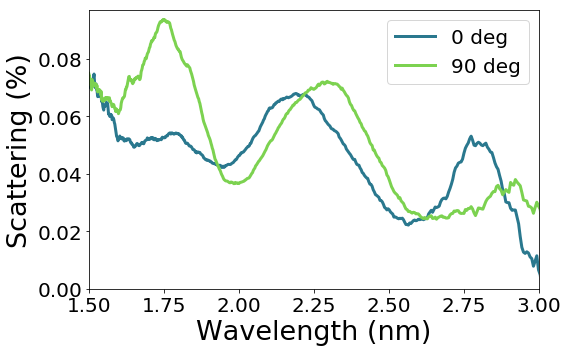

In [112]:
PolDF1_sm = sig.savgol_filter(PolDF1,23,1)
PolDF2_sm = sig.savgol_filter(PolDF2,23,1)
PolDF1_sm = PolDF1_sm[start_ind:fin_ind]
PolDF2_sm = PolDF2_sm[start_ind:fin_ind]
wl_r = wl[start_ind:fin_ind]
e = 1243.125/wl_r

fig = plt.figure(1, figsize = (8,5))
ax = fig.add_subplot(111)
ax.plot(e,PolDF1_sm*100, color = colours_1[200], label = "0 deg", linewidth=3)
ax.plot(e,PolDF2_sm*100, color = colours_1[400], label = "90 deg", lw=3)
ax.set_ylabel("Scattering (%)", fontsize = 27)
ax.set_xlabel("Wavelength (nm)", fontsize = 27)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 0.097)
ax.set_xlim(1.5, 3)
ax.legend(fontsize=20)

fig.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Fabry-Perot hBN publication/Pol meas/Filter2', bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


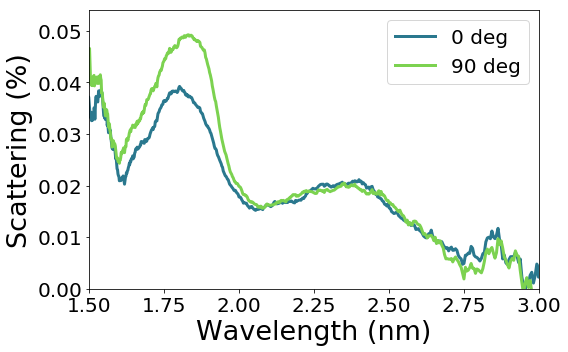

In [10]:
#Scattering

df_ref = opt_meas_1.values()[0].attrs['reference']
df_bgd = opt_meas_1.values()[0].attrs['background']
wl = opt_meas_1.values()[0].attrs['wavelengths']
PolDF1 = ((opt_meas_1["NP_0deg_f1_0"].value) - df_bgd)/(df_ref - df_bgd)
PolDF2 = ((opt_meas_1["NP_90deg_f1_0"].value) - df_bgd)/(df_ref - df_bgd)
start_wl = 410 #Wavelength range to use - normalisation can be ruined by noise
fin_wl = 850
start_ind = (np.abs(wl - start_wl)).argmin()
fin_ind = (np.abs(wl - fin_wl)).argmin()
e_r = 1243.125/wl

PolDF1_sm = sig.savgol_filter(PolDF1,23,1)
PolDF2_sm = sig.savgol_filter(PolDF2,23,1)
PolDF1_sm = PolDF1_sm[start_ind:fin_ind]
PolDF2_sm = PolDF2_sm[start_ind:fin_ind]
wl_r = wl[start_ind:fin_ind]
e = 1243.125/wl_r

fig = plt.figure(1, figsize = (8,5))
ax = fig.add_subplot(111)
ax.plot(e,PolDF1_sm*100, color = colours_1[200], label = "0 deg", lw=3 )
ax.plot(e,PolDF2_sm*100, color = colours_1[400], label = "90 deg", lw=3)
ax.set_ylabel("Scattering (%)", fontsize = 27)
ax.set_xlabel("Wavelength (nm)", fontsize = 27)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 0.054)
ax.set_xlim(1.5, 3.0)
ax.legend(fontsize = 20)

fig.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Fabry-Perot hBN publication/Pol meas/NP1 filter 1', bbox_inches='tight')


C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in divide
  
C:\Users\alexc\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
C:\Users\alexc\Anaconda2\lib\site-packages\scipy\signal\_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


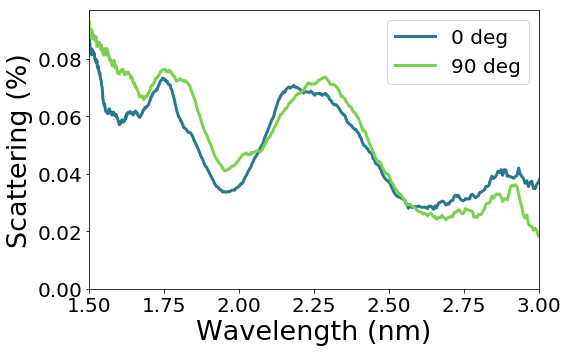

In [13]:
#Scattering

df_ref = opt_meas_1.values()[0].attrs['reference']
df_bgd = opt_meas_1.values()[0].attrs['background']
wl = opt_meas_1.values()[0].attrs['wavelengths']
PolDF1 = ((opt_meas_1["NP2_0deg_f2_0"].value) - df_bgd)/(df_ref - df_bgd)
PolDF2 = ((opt_meas_1["NP2_90deg_f2_0"].value) - df_bgd)/(df_ref - df_bgd)
start_wl = 410 #Wavelength range to use - normalisation can be ruined by noise
fin_wl = 850
start_ind = (np.abs(wl - start_wl)).argmin()
fin_ind = (np.abs(wl - fin_wl)).argmin()
e_r = 1243.125/wl

PolDF1_sm = sig.savgol_filter(PolDF1,23,1)
PolDF2_sm = sig.savgol_filter(PolDF2,23,1)
PolDF1_sm = PolDF1_sm[start_ind:fin_ind]
PolDF2_sm = PolDF2_sm[start_ind:fin_ind]
wl_r = wl[start_ind:fin_ind]
e = 1243.125/wl_r

fig = plt.figure(1, figsize = (8,5))
ax = fig.add_subplot(111)
ax.plot(e,PolDF1_sm*100, color = colours_1[200], label = "0 deg", lw=3 )
ax.plot(e,PolDF2_sm*100, color = colours_1[400], label = "90 deg", lw=3)
ax.set_ylabel("Scattering (%)", fontsize = 27)
ax.set_xlabel("Wavelength (nm)", fontsize = 27)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_ylim(0, 0.097)
ax.set_xlim(1.5, 3.0)
ax.legend(fontsize = 20)

fig.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/Fabry-Perot hBN publication/Pol meas/NP2 filter 2', bbox_inches='tight')
